Reference: [W. Ahmad, "Making AI Art with Style Transfer using Keras".](https://medium.com/mlreview/making-ai-art-with-style-transfer-using-keras-8bb5fa44b216)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input
from scipy.optimize import fmin_l_bfgs_b
import time

Fetch and show the source images:

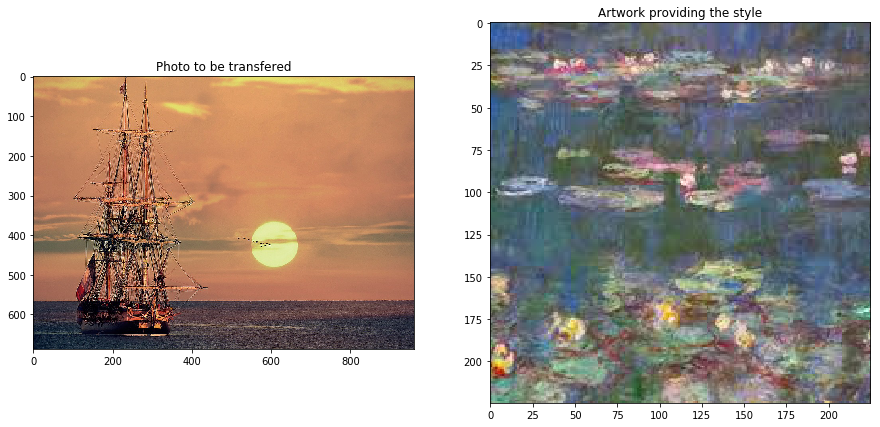

In [2]:
stylePics = ['monet1', 'monet2', 'vangogh', 'mondrian']
beforePics = ['sunset', 'rocks', 'trees', 'street']
beforeDir, afterDir, styleDir = './Assets/Before/', './Assets/After/', './Assets/Style/'

beforeIdx, styleIdx = 0, 0 # Can be i, j in a loop

cImPath = beforeDir + beforePics[beforeIdx] + '.jpg'
sImPath = styleDir + stylePics[styleIdx] + '.jpg'
genImOutputPath = afterDir + 'output' + str(beforeIdx) + str(styleIdx) + '.jpg'

fig = plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(mpimg.imread(cImPath))
plt.title('Photo to be transfered')
plt.subplot(122)
plt.imshow(mpimg.imread(sImPath))
plt.title('Artwork providing the style')
plt.show()

------------------------------------------------------------------------------------------------------------
Initialize the resulting image with a random color values.